<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Wide_Residual_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wide Residual Networks**

논문 링크: https://arxiv.org/abs/1605.07146

ResNet은 residual block이라는 개념을 사용하여 layer를 1000개 이상으로 쌓아 네트워크를 학습하는데 성공하였다. 하지만 이렇게 너무 깊게 쌓아버리면 성능이 안좋아지는 문제가 발생한다.

따라서 본 논문에서는 이처럼 depth를 늘리는 것이 아닌 width를 키움으로써 성능을 높이는 **WRN(Wide Residual Network)**을 제안한다.

이러한 아이디어를 제안하게 된 계기는 바로 identity mapping에 대한 생각 때문이다. 본 논문의 저자는 identity mapping이 ResNet의 강점이자 약점이라고 주장한다. 그 이유는 identity mapping 즉, **shortcut connection에 parameter가 없기 때문에 gradient가 shortcut connection을 따라서 흐를 경우 network는 아무것도 학습하지 못할 가능성이 있다**는 것이다.

쉽게 생각하면 fully-connected layer에서 발생하는 co-adaptation 문제와 유사하다. fully-connected layer에서 이를 해결하기 위해 dropout을 사용하는 것처럼 ResNet에서도 ResDrop과 같은 아이디어가 나왔다. 아무튼 결과적으로 단순히 depth만 계속 늘리는 것은 성능을 높이는데 좋은 방법이 아니라는 것을 알 수 있다.

## **Wide ResNet 구조**

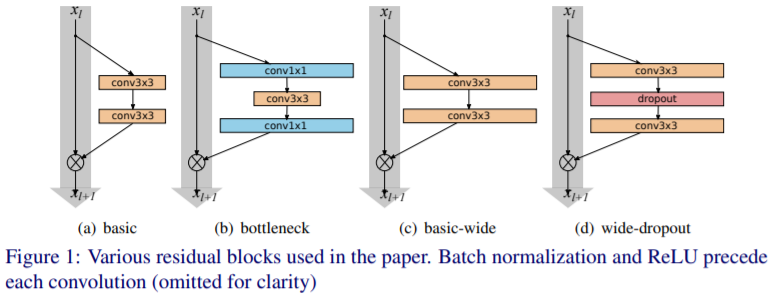

위의 그림 Figure 1에서 (a)와 (b) 부분을 보면 ResNet은 네트워크를 깊게 쌓기 위해 즉, depth를 높이기 위해 residual block의 convolution filter의 개수를 최소화했다. 심지어는 병목 구조(bottleneck block)를 사용하여 더 적은 filter를 사용했다. 하지만 앞서 언급했듯이 WideResNet은 depth를 늘리는 것에 관심이 없기 때문에 위의 그림 Figure 1의 (c)와 (d) 부분과 같이 residual block의 convolution filter의 수를 늘렸다.

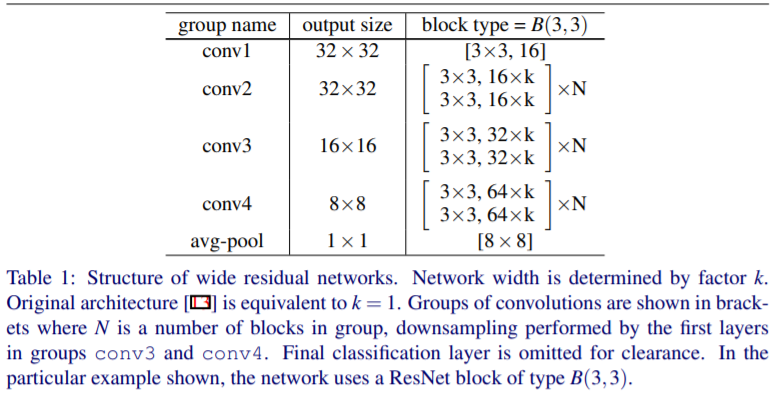

위의 표 Table 1을 보면 CIFAR dataset에 적용된 ResNet의 경우 size가 32 -> 16 -> 8로 줄면서 width는 16 -> 32 -> 64로 늘어난다. 이때 Wide ResNet은 이 widht를 N배로 늘린다. WideResNet은 16 ~ 40의 depth를 가지는데 depth가 얕을수록 widht는 커진다.

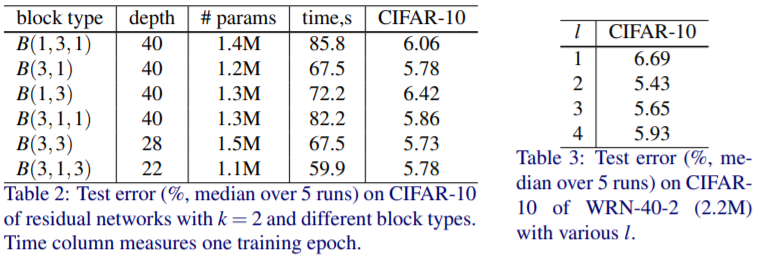

위의 표 Table 2의 block type B는

1. B(3,3) - original «basic» block
2. B(3,1,3) - with one extra 1×1 layer
3. B(1,3,1) - with the same dimensionality of all convolutions, «straightened» bottleneck
4. B(1,3) - the network has alternating 1×1 - 3×3 convolutions everywhere
5. B(3,1) - similar idea to the previous block
6. B(3,1,1) - Network-in-Network style block

위와 같다. 그리고 B(3,3)과 B(3,1,3)의 경우는 WRN-28-2를 사용했으며, 나머지는 WRN-40-2를 사용했다. 그 이유는 전자의 두 경우는 3 x 3 conv가 2개가 있으므로 parameter의 수를 비슷하게 맞춰주기 위해서이다.

아무튼 위의 표 Table 2는 epoch가 5 이상일때 시간과 test acc를 보여준다. B(3, 3)이 정확도만 보면 제일 성능이 좋았으며, B(3,1,3)이 비슷한 성능을 가지면서도 속도는 제일 빠르다.

그리고 위의 표 Table 3은 WRN-40-2에 대해 deepening factor l를 1 ~ 4로 바꾸면서 test error를 구한것이다. I가 2일때 가장 좋은 성능을 보인다.

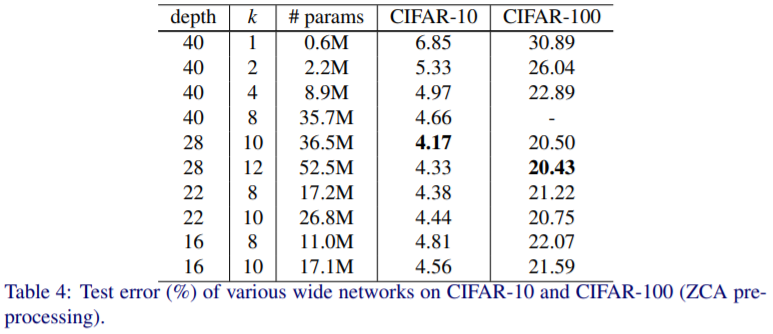

위의 표 Table 4는 depth를 [40, 28, 22, 16] 그리고 widening parameter k를 [1, 2, 4, 8, 10, 12] 값으로 변경하여 CIFAR-10과 CIFAR-100에 대해서 결과를 구한 것이다. k의 값이 높아질수록 성능이 좋아지는 것을 알 수 있으며, 이때 depth의 값도 k에 따라 조절해야하는 것을 알 수 있다.

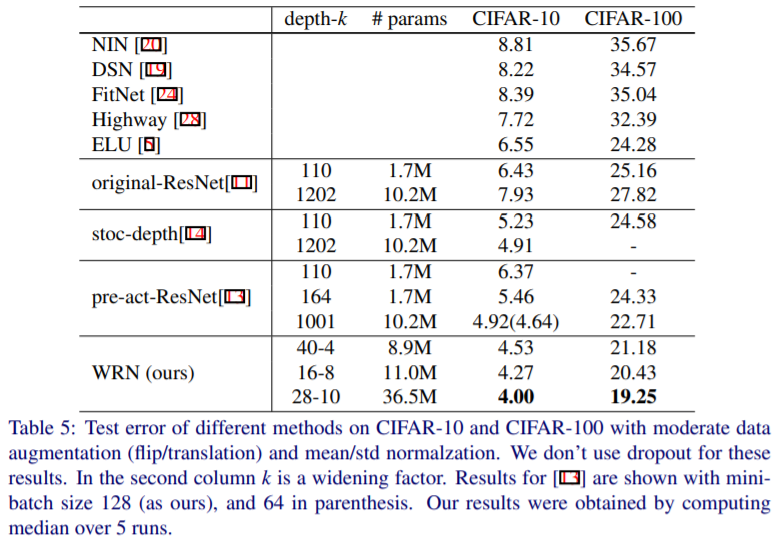

위의 표 Table 5를 보면 ResNet-1001과 비슷한 parameter를 가지는 WRN-16-8의 경우에도 성능이 좋은 것을 볼 수 있다. 뿐만아니라 기존 ResNet-1001보다 WRN-28-10이 parameter가 3배 이상 많음에도 accuracy가 더 높은 것을 보아 WideResNet이 기존 ResNet보다 성능이 좋다는 것을 알 수 있다.

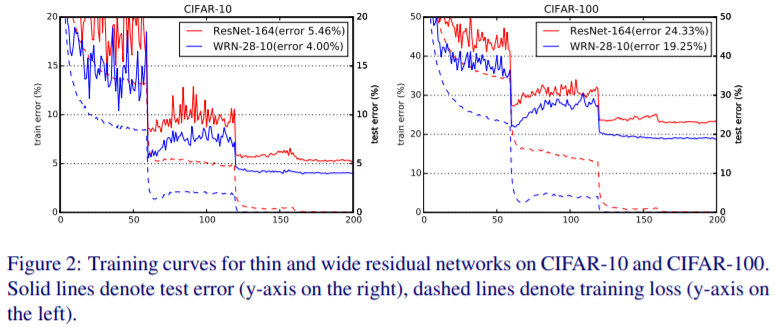

위의 그림 Figure 2는 training curves이다. 왼쪽은 CIFAR-10에 대한 것이며, 오른쪽은 CIFAR-100에 대한 것이다.

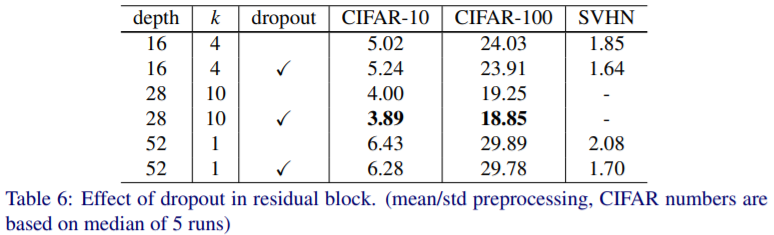

위의 표 Table 6은 WRN의 depth와 k 그리고 dropout을 조정하여 최대 **CIFAR-10에 대해 3.89 error rate, CIFAR-100에 대해 18.85 error rate**를 가지는 것을 알 수 있다. 이때 dropout rate는 0.3을 사용했다.

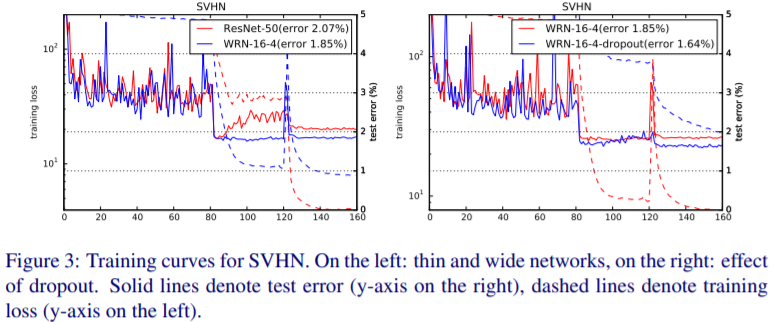

위의 그림 Figure 3은 SVHN에 대해 왼쪽은 ResNet-50과 WRN-16-4를 비교한 것이고, 오른쪽은 WRN-16-4에 대해 dropout의 유무에 따른 결과를 비교한 것이다.